# CS5785 Homework 2

## 3. Kernel Density Estimation

[Yufan Zhang](https://yufanbruce.com/) (yz2894)

Tian Jin (tj299)


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Ignore any warnings
import warnings

warnings.filterwarnings("ignore")


In [25]:
# PATH variables
DATA_PATH = "./data/"
IMG_PATH = "./img/"
RESULT_PATH = "./result/"

if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH)

if not os.path.exists(RESULT_PATH):
    os.makedirs(RESULT_PATH)

### a. Plot the density estimate

In [26]:
from sklearn.neighbors import KernelDensity

# Given data
data = np.array([26, 30, 27, 18, 75, 66, 73, 63, 56, 83]).reshape(-1, 1)

# Values of x for the density estimate
x_vals = np.linspace(min(data)-20, max(data)+20, 1000).reshape(-1, 1)

#### Implement with Sklearn

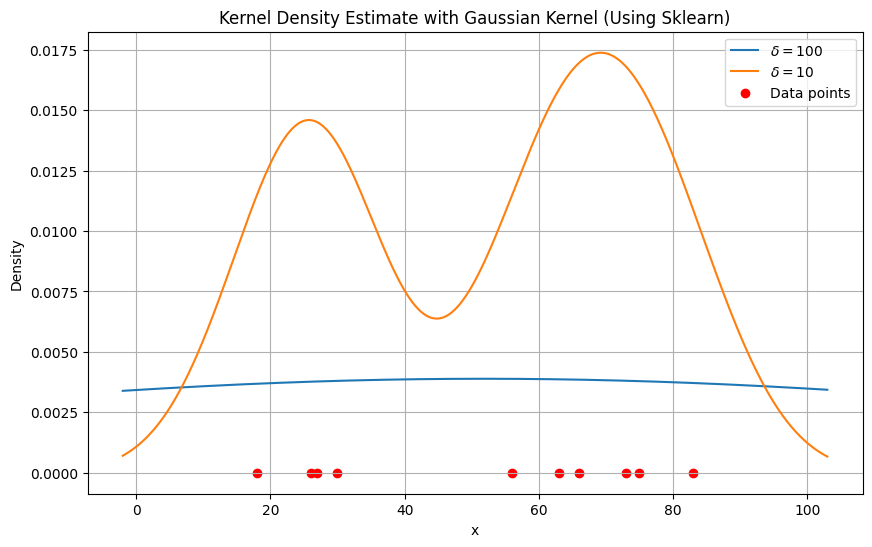

In [27]:
# Kernel density estimation for δ = 100
kde_100 = KernelDensity(kernel='gaussian', bandwidth=100).fit(data)
log_density_100 = kde_100.score_samples(x_vals)

# Kernel density estimation for δ = 10
kde_10 = KernelDensity(kernel='gaussian', bandwidth=10).fit(data)
log_density_10 = kde_10.score_samples(x_vals)

# Plotting the density estimates
plt.figure(figsize=(10, 6))
plt.plot(x_vals, np.exp(log_density_100), label='$\delta=100$')
plt.plot(x_vals, np.exp(log_density_10), label='$\delta=10$')
plt.scatter(data, np.zeros_like(data), color='red', label='Data points')
plt.title('Kernel Density Estimate with Gaussian Kernel (Using Sklearn)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.savefig(IMG_PATH + 'sklearn_kde.png')
plt.show()

#### Implement with Numpy

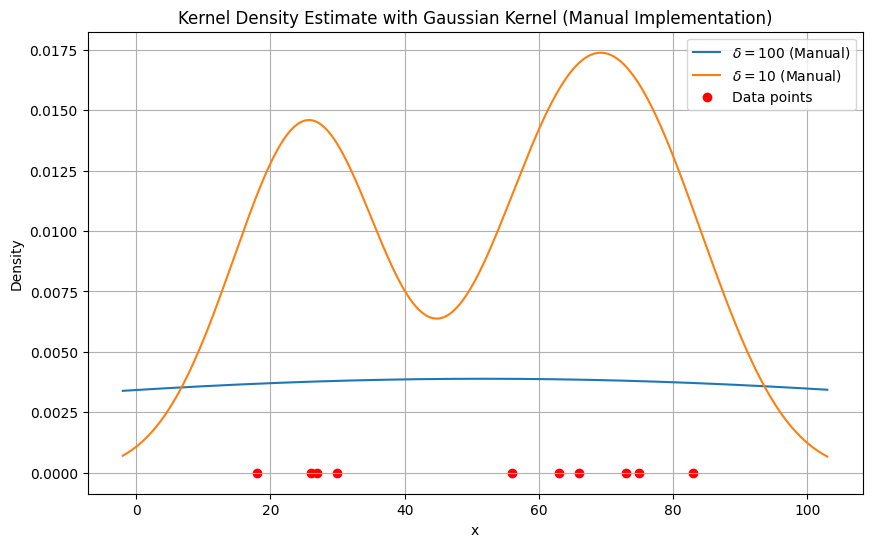

In [28]:
# Function to calculate Gaussian kernel density estimate
def gaussian_kde(x, data, bandwidth):
    n = len(data)
    constant = 1 / (np.sqrt(2 * np.pi) * bandwidth)
    densities = np.sum(
        [constant * np.exp(-((x - xi) ** 2) / (2 * bandwidth**2)) for xi in data],
        axis=0,
    )
    return densities / n


# Calculating densities manually
density_100_manual = gaussian_kde(x_vals, data, bandwidth=100)
density_10_manual = gaussian_kde(x_vals, data, bandwidth=10)

# Plotting the manually calculated densities
plt.figure(figsize=(10, 6))
plt.plot(x_vals, density_100_manual, label="$\delta=100$ (Manual)")
plt.plot(x_vals, density_10_manual, label="$\delta=10$ (Manual)")
plt.scatter(data, np.zeros_like(data), color="red", label="Data points")
plt.title("Kernel Density Estimate with Gaussian Kernel (Manual Implementation)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.savefig(IMG_PATH + "manual_kde.png")
plt.show()

### b. Compare the two bandwidths

**Explain which of the above two choices of δ you think is better. Name at least one method for choosing the better δ out of the two options.**

The choice of $\delta = 10$ is a preferable choice for this dataset.

- Bandwidth $\delta = 10$: The curve is more wiggly and appears to fit closely to the data. It captures the individual peaks in the data distribution, which may indicate local variations in the data.

- Bandwidth $\delta = 100$: This curve is smoother and provides a broad overview of the data. It essentially averages out the local variations and might be oversimplifying the data distribution.

Method for choosing $\delta$:

- **Cross-Validation**: We can partition the data into training and validation sets, compute the KDE for the training set using a given bandwidth, and then evaluate how well this KDE predicts the validation set. The bandwidth that performs best (typically measured by log-likelihood) on the validation set is chosen.

- **Visual Inspection**: As demonstrated here, a visual inspection of the KDE plot for different bandwidths can give a good idea of which bandwidth provides a better representation of the data.


### c. Probability of new points

Suppose you observe two new samples: 30 and 95. Compute and report their (possibly unnormalized) probability $\hat{p}(x)$ for both δ = 100 and δ = 10.

In [29]:
kde_100 = KernelDensity(kernel='gaussian', bandwidth=100).fit(data)
kde_10 = KernelDensity(kernel='gaussian', bandwidth=10).fit(data)

# New samples
new_samples = np.array([30, 95]).reshape(-1, 1)

# Calculating the density estimates for the new points
density_new_100 = kde_100.score_samples(new_samples)
density_new_10 = kde_10.score_samples(new_samples)

# Returning the density values of the new points
print(np.exp(density_new_100), np.exp(density_new_10))

[0.00380071 0.00355839] [0.01358759 0.00292187]


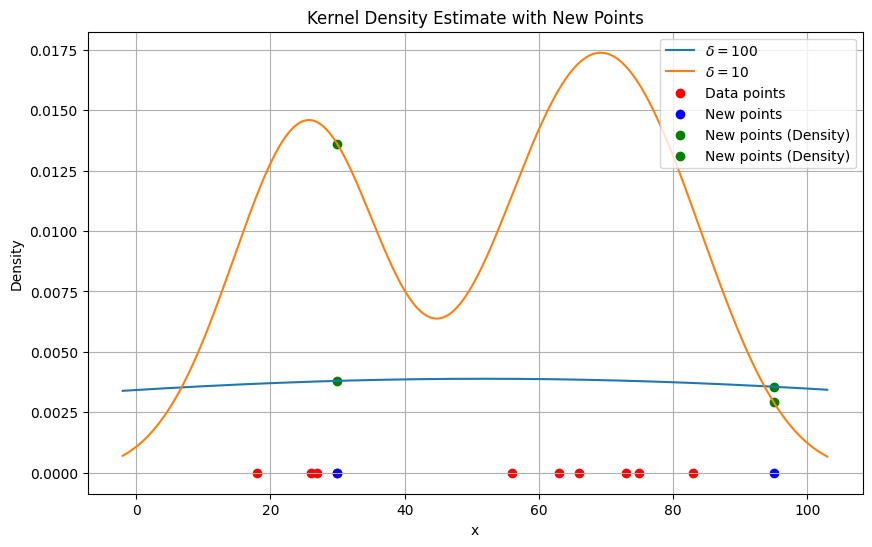

In [30]:
# Plotting the density estimates with new points
plt.figure(figsize=(10, 6))
plt.plot(x_vals, np.exp(log_density_100), label="$\delta=100$")
plt.plot(x_vals, np.exp(log_density_10), label="$\delta=10$")
plt.scatter(data, np.zeros_like(data), color="red", label="Data points")
plt.scatter(new_samples, np.zeros_like(new_samples), color="blue", label="New points")

# Highlighting new samples
plt.scatter(
    new_samples, np.exp(density_new_100), color="green", label="New points (Density)"
)
plt.scatter(
    new_samples, np.exp(density_new_10), color="green", label="New points (Density)"
)

plt.title("Kernel Density Estimate with New Points")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.savefig(IMG_PATH + "new_points.png")
plt.show()

### d. Rule to accept or reject points

Provide one possible rule by which a kernel density estimate can be used to either accept a point as being part of the data  distribution or reject it for being an outlier. Provide one scenario in which this strategy might not work.

### e. Compare Gaussian and Tophat kernels

Let’s say that instead of a Gaussian kernel, a Tophat kernel (K (x, z; δ) = 1 if ||x−z|| ≤ δ/2 else 0) is chosen for modeling. Plot the Tophat density estimate ˜p(x) of the dataset as a function of x on an interval containing the data using δ = 10. Give one example of a shortcoming of the Tophat kernel density estimate for outlier detection relative to the Gaussian kernel.

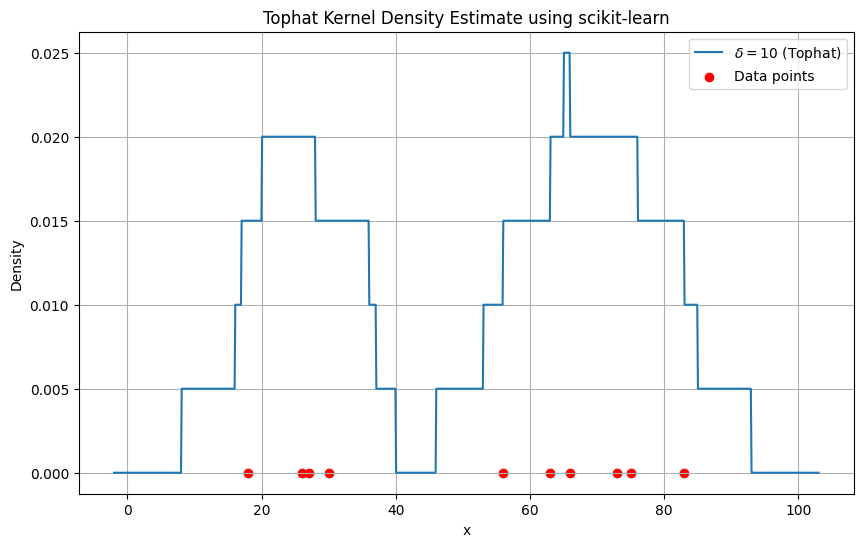

In [31]:
# Kernel density estimation with Tophat kernel for δ = 10
kde_tophat_10 = KernelDensity(kernel="tophat", bandwidth=10).fit(data.reshape(-1, 1))
log_density_tophat_10 = kde_tophat_10.score_samples(x_vals)

# Plotting the Tophat kernel density estimates
plt.figure(figsize=(10, 6))
plt.plot(x_vals, np.exp(log_density_tophat_10), label="$\delta=10$ (Tophat)")
plt.scatter(data, np.zeros_like(data), color="red", label="Data points")
plt.title("Tophat Kernel Density Estimate using scikit-learn")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.savefig(IMG_PATH + "tophat_kde.png")
plt.show()

## Local Optima in K-mean

Depending on initialization, K-means can get stuck on local optima. Construct an example dataset, and provide two different initializations for it such that K-means would return different final clusterings on it.

In [13]:
from sklearn.cluster import KMeans

def print_clusters(X, labels):
    clusters = {}
    for i, label in enumerate(labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(X[i][0])
    for label, cluster in clusters.items():
        print(f"Cluster {label+1}: {cluster}")

# Define the data points
X = np.array([[0], [2], [6], [11], [12], [13]])

# Initialization 1
init_1 = np.array([[2], [12]])
kmeans_1 = KMeans(n_clusters=2, init=init_1, n_init=1, random_state=42)
kmeans_1.fit(X)
print("Initialization 1:")
print_clusters(X, kmeans_1.labels_)

# Initialization 2
init_2 = np.array([[0], [6]])
kmeans_2 = KMeans(n_clusters=2, init=init_2, n_init=1, random_state=42)
kmeans_2.fit(X)
print("\nInitialization 2:")
print_clusters(X, kmeans_2.labels_)


Initialization 1:
Cluster 1: [0, 2, 6]
Cluster 2: [11, 12, 13]

Initialization 2:
Cluster 1: [0, 2]
Cluster 2: [6, 11, 12, 13]
